In [57]:
import pandas as pd
import seaborn as sns
import os
import math

In [72]:
out_path='data_cleaned/'

In [16]:
os.listdir('data')

['sider.csv.gz',
 'deepchem_Lipophilicity.csv',
 'clintox.csv.gz.dvc',
 'HIV.csv.dvc',
 'deepchem_PPB.csv',
 'HIV.csv',
 'Solubility_delaney-processed.csv',
 'BBBP.csv.dvc',
 'muv.csv.gz.dvc',
 'Solubility_delaney-processed.csv.dvc',
 '.gitignore',
 'sider.csv.gz.dvc',
 'Free_Solv_SAMPL.csv.dvc',
 'bace.csv.dvc',
 'tox21.csv.gz',
 'BBBP.csv',
 '.ipynb_checkpoints',
 'deepchem_PPB_details.txt',
 'clintox.csv.gz',
 'bace.csv',
 'deepchem_Lipophilicity.csv.dvc',
 'deepchem_Lipophilicity_details.txt',
 'Free_Solv_SAMPL.csv',
 'muv.csv.gz',
 'deepchem_PPB.csv.dvc']

In [29]:
bace=pd.read_csv('data/bace.csv')
bace.head()
print(bace.shape)
# https://www.collaborativedrug.com/what-is-pic50-2/ support cut-off at 6
print(bace[bace['pIC50']>6].shape)
bace['active']=bace['pIC50'].apply(lambda x: 1 if x>6 else 0)
bace.head(2)

(1513, 595)
(1012, 595)


,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID,active
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,78.640335,226.85541,107.43491,37.133846,0.00000,7.980170,0.0,0.000000,1,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,47.171600,365.67694,174.07675,34.923889,7.98017,24.148668,0.0,24.663788,2,1


In [74]:
bace.to_csv(os.path.join(out_path,'bace.csv'))

In [40]:
tox21=pd.read_csv('data/tox21.csv.gz',compression='gzip')
#https://tripod.nih.gov/tox/assays for assay descriptions
print(tox21['NR-AhR'].sum())
print(tox21.shape)
tox21.describe()

768.0
(7831, 14)


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
count,7265.000000,6758.000000,6549.000000,5821.000000,6193.000000,6955.000000,6450.000000,5832.000000,7072.000000,6467.000000,5810.000000,6774.000000
mean,0.042533,0.035070,0.117270,0.051538,0.128048,0.050324,0.028837,0.161523,0.037330,0.057523,0.158003,0.062445
std,0.201815,0.183969,0.321766,0.221110,0.334170,0.218627,0.167362,0.368044,0.189583,0.232857,0.364776,0.241979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
tox21.to_csv(os.path.join(out_path,'tox21.csv'))

In [41]:
tox21.head(2)

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O


In [47]:
sider=pd.read_csv('data/sider.csv.gz')

sider.head(2)
#sider.describe()
sider.sample(10)
sider['count']=sider.sum(axis=1)
sider.sort_values(by='count')

/var/folders/fj/7h5gzg89171dx42kvbqrk1mh0000gn/T/ipykernel_46424/111212188.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sider['count']=sider.sum(axis=1)


,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",count
1142,C1=CC(=C(C=C1Cl)O)OC2=C(C=C(C=C2)Cl)Cl,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1010,CN(C)CCN(CC1=CC=C(C=C1)OC)C2=CC=CC=N2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1366,[Zn],0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1365,[Y],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
191,[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[C-]#N.[Fe+2],0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,CN(C)CCC1=CNC2=C1C=C(C=C2)CC3COC(=O)N3,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,26
1126,CC1(OC2COC3(C(C2O1)OC(O3)(C)C)COS(=O)(=O)N)C,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,26
603,COCCCCC(=NOCCN)C1=CC=C(C=C1)C(F)(F)F,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,26
510,CCCC(CCC)C(=O)O,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,26


In [76]:
# sider doesn't seem to have any which aren't flagged for some tox issue, I'm not sure how well it fits our problem

In [49]:
clintox=pd.read_csv('data/clintox.csv.gz')
print(clintox.shape)
print(clintox.CT_TOX.sum())
clintox.head(2)

(1484, 3)
112


,smiles,FDA_APPROVED,CT_TOX
0,*C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0


In [80]:
clintox.to_csv(os.path.join(out_path,'clintox.csv'))

In [63]:
sol_del=pd.read_csv('data/Solubility_delaney-processed.csv')
print(math.log10(0.1))
print(10**(-3.3))
#use 0.1 M for cutoff (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3399483/)
sol_del['binned_sol']=sol_del['measured log solubility in mols per litre'].apply(lambda x: 1 if x >=-1 else 0)
print(sol_del['binned_sol'].shape)
print(sol_del['binned_sol'].sum())
sol_del.head(5)


-1.0
0.0005011872336272725
(1128,)
185


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,binned_sol
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,1
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,0
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),0
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,0


In [83]:
sol_del.to_csv(os.path.join(out_path,'sol_del.csv'))

In [66]:
logD=pd.read_csv('data/deepchem_Lipophilicity.csv')
# filter based on Ghose filter: https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five
logD['drug_like']=logD['exp'].apply(lambda x: 1 if (x >= -0.4) & (x <= 5.6) else 0)
logD.head(5)

,CMPD_CHEMBLID,exp,smiles,drug_like
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,1
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...,0
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl,1
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...,1
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...,1


In [85]:
logD.to_csv(os.path.join(out_path,'deepchem_Lipophilicity.csv'))

In [67]:
data_map={
    'HIV.csv': {'target':'HIV_active','structure':'smiles'},
    'bace.csv':{'target':'active','structure':'mol'},
    'tox21.csv':{'target':'NR-AhR','structure':'smiles'},
    'cintox.csv':{'target':'CT_TOX','structure':'smiles'},
    'Solubility_delaney-processed.csv':{'target':'binned_sol','structure':'smiles'},
    'deepchem_Lipophilicity.csv':{'target':'drug_like','structure':'smiles'}   
}


In [17]:
datasets=['bace.csv','BBBP.csv','PPB.csv','deepchem_Lipophilicity.csv','deepchem_PPB.csv']

In [7]:
df=pd.read_csv('data/HIV.csv')

In [86]:
df.to_csv(os.path.join(out_path,'HIV.csv'))

In [8]:
df.head(5)

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0


In [10]:
df.value_counts('HIV_active')

HIV_active
0    39684
1     1443
dtype: int64

In [13]:
df.isna().sum()

smiles        0
activity      0
HIV_active    0
dtype: int64

<AxesSubplot:xlabel='HIV_active', ylabel='Count'>

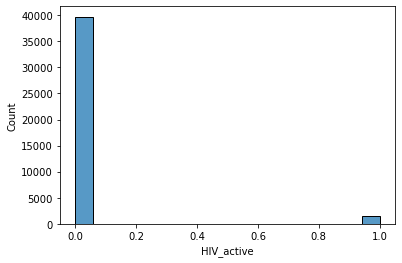

In [11]:
sns.histplot(df,x='HIV_active')

In [12]:
#To do- build dictionary of dataset:target column
#Add column named Target to each dataset.
#Convert data sets with regression problems into classification ones
# EDA: class balance, clustering? to assess chemical variability?
# check for missing values


In [14]:
# add simple features? (LogP, MW/#heavy atoms,others? - look for correlation?

In [71]:
print(len(data_map.keys()))
data_map.keys()

6


dict_keys(['HIV.csv', 'bace.csv', 'tox21.csv.gz', 'cintox.csv.gz', 'Solubility_delaney-processed.csv', 'deepchem_Lipophilicity.csv'])

In [ ]:
n=0

for key in data_map.keys():
    